In [1]:
import numpy as np
from tqdm import tqdm

In [2]:
def ControllPacket(p, M, k_min=1, k_max=400, step=5, **kwargs):
    pi_list = []
    for k in tqdm(range(k_min, k_max+1, step)):
        pi_list.append(GetPi_OCP(p, k, M=M, **kwargs))
    return np.array(pi_list)

In [3]:
def GetPi_OCP(p, k, M = 1, n_iter = 10**6, batch_size=100):
    lost_counter = 0
    check = 0
    for i in range(n_iter//batch_size):
        mask = np.random.random((batch_size, k)) <= p
        mask = np.sum(mask, axis=1)
        control_packet = np.random.random((batch_size, M)) > p
        control_packet = np.sum(control_packet, axis=1)
        mask[mask <= control_packet] = 0
        lost_counter += np.sum(mask)
    return lost_counter / ((n_iter//batch_size) * batch_size * k)

In [15]:
GetPi_OCP(0.002, 5)

2.24e-05

In [16]:
GetPi_OCP(0.005, 5)

0.0001264

In [17]:
GetPi_OCP(0.007, 5)

0.0002286

In [18]:
GetPi_OCP(0.01, 5)

0.0004992

In [19]:
GetPi_OCP(0.015, 5)

0.0011098

In [14]:
GetPi_OCP(0.02, 4)

0.00155475

In [109]:
pi_list = ControllPacket(0.002, 1, k_min=10, k_max=400, step=5)

100%|██████████████████████████████████████████████████████████████████████████████████| 79/79 [02:40<00:00,  2.03s/it]


In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'svg' 

sns.set(style="darkgrid")

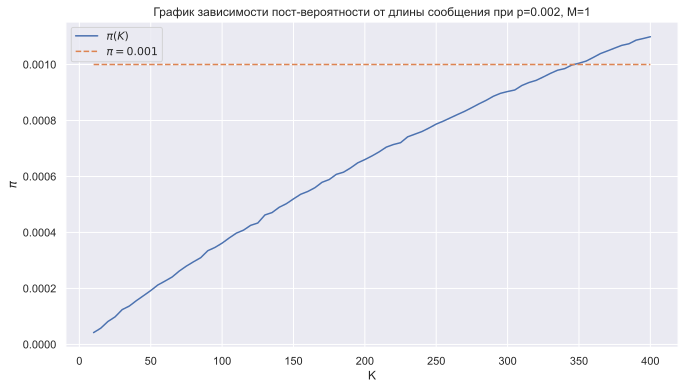

In [110]:
fig, ax = plt.subplots()
fig.set_figwidth(11)
fig.set_figheight(6)

ax.set_xlabel('K')
ax.set_ylabel(r'$\pi$')
plt.title('График зависимости пост-вероятности от длины сообщения при p=0.002, M=1')
plt.grid()

plt.plot(np.arange(10,401,5), pi_list, zorder=3, label=r'$\pi(K)$')
plt.plot(np.arange(10,401,5), [0.001] * 79, zorder=3,  linestyle = '--', label=r'$\pi=0.001$')
plt.grid()
plt.legend()
plt.savefig('p=0.002_M=1.pdf')
plt.show()

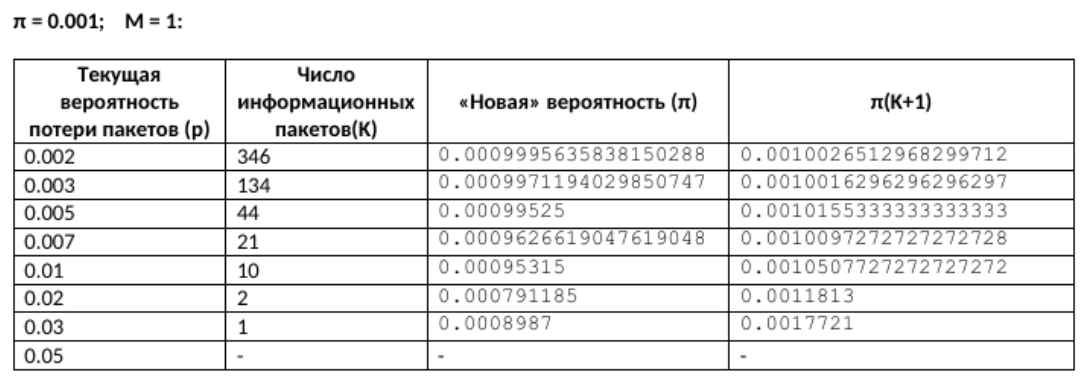

In [108]:
(np.log(0.001) - np.log(0.002))/np.log(1-0.002)

346.22690104949123

odd/even

In [81]:
def GetPi_OCP(p, k, M = 1, n_iter = 10**6, batch_size=100):
    lost_counter = 0
    check = 0
    for i in range(n_iter//batch_size):
        mask = np.random.random((batch_size, k)) <= p
        mask = np.sum(mask, axis=1)
        control_packet = np.random.random((batch_size, M)) > p
        control_packet = np.sum(control_packet, axis=1)
        mask[mask <= control_packet] = 0
        lost_counter += np.sum(mask)
    return lost_counter / ((n_iter//batch_size) * batch_size)

In [82]:
def GetPi_OddEven(p, k, n_iter = 10**6, batch_size=100):
    k1, k2 = k//2, k - k//2
#     print(k1,k2)
    a = GetPi_OCP(p, k1) + GetPi_OCP(p, k2)
#     print(GetPi_OCP(p, k1), GetPi_OCP(p, k2))
    return a/k

In [85]:
def ControllPacket2(p, M=1, k_min=1, k_max=400, step=5, **kwargs):
    pi_list = []
    for k in tqdm(range(k_min, k_max+1, step)):
        pi_list.append(GetPi_OddEven(p, k, **kwargs))
    return np.array(pi_list)

In [86]:
p_list_eo = ControllPacket2(0.005, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:27<00:00,  6.91s/it]


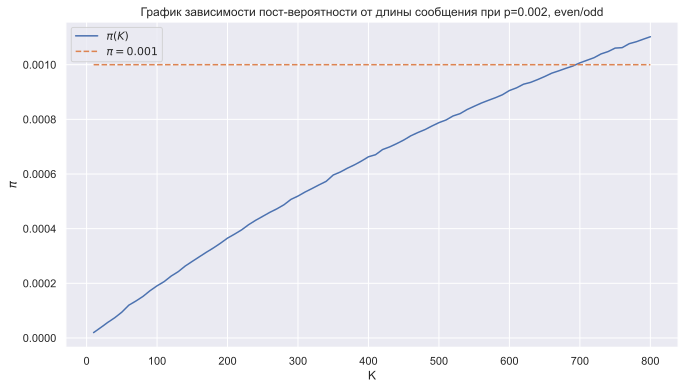

In [46]:
fig, ax = plt.subplots()
fig.set_figwidth(11)
fig.set_figheight(6)

ax.set_xlabel('K')
ax.set_ylabel(r'$\pi$')
plt.title('График зависимости пост-вероятности от длины сообщения при p=0.002, even/odd')
plt.grid()

plt.plot(np.arange(10,801,10), pi_list, zorder=3, label=r'$\pi(K)$')
plt.plot(np.arange(10,801,10), [0.001] * 80, zorder=3,  linestyle = '--', label=r'$\pi=0.001$')
plt.grid()
plt.legend()
plt.savefig('p=0.002_M=2.pdf')
plt.show()

In [57]:
def ControllPacket(p, M, k_min=1, k_max=400, step=5, **kwargs):
    pi_list = []
    for k in tqdm(range(k_min, k_max+1, step)):
        pi_list.append(GetPi_OCP(p, k, M=M, **kwargs))
    return np.array(pi_list)

In [60]:
def GetPi_OCP(p, k, M = 1, n_iter = 10**6, batch_size=100):
    lost_counter = 0
    check = 0
    for i in range(n_iter//batch_size):
        mask = np.random.random((batch_size, k)) <= p
        mask = np.sum(mask, axis=1)
        control_packet = np.random.random((batch_size, M)) > p
        control_packet = (np.sum(control_packet, axis=1) == M) * M
        mask[mask <= control_packet] = 0
        lost_counter += np.sum(mask)
    return lost_counter / ((n_iter//batch_size) * batch_size * k)

In [33]:
GetPi_OCP(0.002, 50, 1)

0.00019292

In [35]:
GetPi_OCP(0.005, 50, 2)

0.00022204

In [36]:
GetPi_OCP(0.007, 50, 2)

0.00051306

In [51]:
GetPi_OCP(0.01, 50, 3)

0.0007115

In [59]:
GetPi_OCP(0.015, 50, 5)

0.00212002

In [90]:
p_list_1 = ControllPacket(0.005, 1, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:55<00:00,  5.86s/it]


In [65]:
p_list_2 = ControllPacket(0.005, 2, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:06<00:00,  6.21s/it]


In [66]:
p_list_3 = ControllPacket(0.005, 3, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:10<00:00,  6.34s/it]


In [67]:
p_list_4 = ControllPacket(0.005, 4, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:58<00:00,  5.94s/it]


In [68]:
p_list_5 = ControllPacket(0.005, 5, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:59<00:00,  5.98s/it]


In [61]:
def ControllPacket(p, M=1, k_min=1, k_max=1500, step=50, **kwargs):
    pi_list = []
    for k in tqdm(range(k_min, k_max+1, step)):
        pi_list.append(GetPi_OCP(p, k, M=M, **kwargs))
    return np.array(pi_list)

In [62]:
def GetPi_OCP(p, k, M = 1, n_iter = 10**6, batch_size=100):
    lost_counter = 0
    check = 0
    for i in range(n_iter//batch_size):
        mask = np.random.random((batch_size, k)) <= p
        mask = np.sum(mask, axis=1)
        control_packet = np.random.random((batch_size, M)) > p
        control_packet = np.sum(control_packet, axis=1)
        mask[mask <= control_packet] = 0
        lost_counter += np.sum(mask)
    return lost_counter / ((n_iter//batch_size) * batch_size * k)

In [123]:
GetPi_OCP(0.002, 1000, 3)

0.000647854

In [126]:
GetPi_OCP(0.005, 1000, 8)

0.00068003

In [128]:
GetPi_OCP(0.007, 1000, 11)

0.000717144

In [131]:
GetPi_OCP(0.01, 1000, 15)

0.000893948

In [135]:
GetPi_OCP(0.015, 1000, 22)

0.000918084

In [77]:
p_list_first = ControllPacket(0.005, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [03:26<00:00,  6.89s/it]


In [ ]:
p_list_eo = ControllPacket(0.005, k_min=1, k_max=1500, step=50, n_iter = 10**6, batch_size=100)

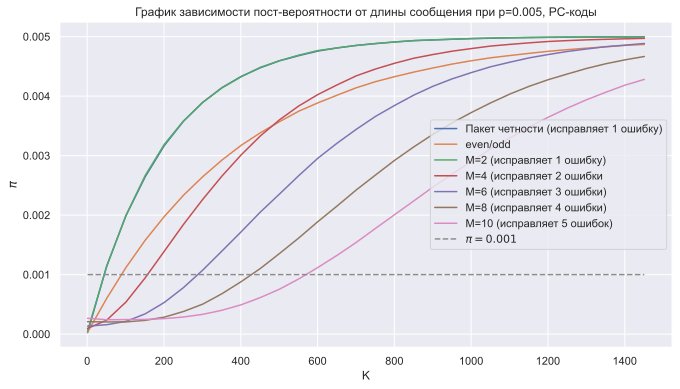

In [92]:
fig, ax = plt.subplots()
fig.set_figwidth(11)
fig.set_figheight(6)

ax.set_xlabel('K')
ax.set_ylabel(r'$\pi$')
plt.title('График зависимости пост-вероятности от длины сообщения при p=0.005, PC-коды')
plt.grid()

plt.plot(np.arange(1,1500,50), p_list_first, zorder=3, label='Пакет четности (исправляет 1 ошибку)')
plt.plot(np.arange(1,1500,50), p_list_eo, zorder=3, label='even/odd')
plt.plot(np.arange(1,1500,50), p_list_1, zorder=3, label='M=2 (исправляет 1 ошибку)')
plt.plot(np.arange(1,1500,50), p_list_2, zorder=3, label='M=4 (исправляет 2 ошибки')
plt.plot(np.arange(1,1500,50), p_list_3, zorder=3, label='M=6 (исправляет 3 ошибки)')
plt.plot(np.arange(1,1500,50), p_list_4, zorder=3, label='M=8 (исправляет 4 ошибки)')
plt.plot(np.arange(1,1500,50), p_list_5, zorder=3, label='M=10 (исправляет 5 ошибок)')
plt.plot(np.arange(1,1500,50), [0.001] * 30, zorder=3,  linestyle = '--', label=r'$\pi=0.001$')
plt.grid()
plt.legend()
plt.savefig('p=0.002.pdf')
plt.show()

In [93]:
!pip install libraptorq

  Created wheel for libraptorq: filename=libraptorq-18.3.0-py3-none-any.whl size=12304 sha256=55e14b790102d059b5bdcffe771147a0a66f963d00a2a9504af2ef64b2e597d4
  Stored in directory: c:\users\илья\appdata\local\pip\cache\wheels\bb\a7\c3\0cf0e1140353aa6a3e7044b0b097a53f920933b70bc65187ef
Successfully built libraptorq


In [94]:
from libraptorq import RQEncoder, RQDecoder

In [97]:
data = 'some input string' * 500

# Data size must be divisible by RQEncoder.data_size_div
data_len, n = len(data), RQEncoder.data_size_div
if data_len % n: data += '\0' * (n - data_len % n)

with RQEncoder(data, min_subsymbol_size=4, symbol_size=16, max_memory=200) as enc:

    symbols = dict()
    oti_scheme, oti_common = enc.oti_scheme, enc.oti_common

    for block in enc:
        symbols.update(block.encode_iter(repair_rate=0))

data_encoded = data_len, oti_scheme, oti_common, symbols

OSError: dlopen(None) cannot work on Windows for Python 3 (see http://bugs.python.org/issue23606)

In [99]:
!conda create —name py2 python=2.7 anaconda 
!conda activate py2
!(py2) conda install ipykernel -y
!(py2) python -m ipykernel install --user --name py2 --display-name "Python 2.7"


CondaValueError: The target prefix is the base prefix. Aborting.

Could not find conda environment: py2
You can list all discoverable environments with `conda info --envs`.

ЌҐЇаҐ¤ўЁ¤Ґ­­®Ґ Ї®пў«Ґ­ЁҐ: conda.
ЌҐЇаҐ¤ўЁ¤Ґ­­®Ґ Ї®пў«Ґ­ЁҐ: python.
